In [1]:
import pandas as pd
import numpy as np
from utils import filter_out_postseason
from utils import simplify_date
from utils import generate_opponent_wins
from utils import team_map
from utils import add_superbowl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
offense = pd.read_csv("../data/raw/NFLRegSeasonOffenseStats.csv")
defense = pd.read_csv("../data/raw/NFLRegSeasonDefenseStats.csv")

In [3]:
offense

,iso_code,Team,Conference,City,State,Year,Wins,Losses,Ties,Passing_Attempts,...,Receiving_Yards,Receiving_TDs,Reciever_Fumbles,Two_Point_Conversions,Kick_Return_TDs,Punt_Return_TDs,Field_Goals_Attempts,Field_Goals_Made,Extra_Points_Attempts,Extra_Points_Made
0,BB,Buffalo Bills,AFC East,Buffalo,New York,2004,9,7,0,461,...,3032,21,4,0,3,2,28,24,45,45
1,BB,Buffalo Bills,AFC East,Buffalo,New York,2005,5,11,0,459,...,2852,18,1,0,1,0,35,29,26,26
2,BB,Buffalo Bills,AFC East,Buffalo,New York,2006,7,9,0,431,...,3051,19,3,0,0,1,25,23,33,33
3,BB,Buffalo Bills,AFC East,Buffalo,New York,2007,7,9,0,445,...,2842,12,4,1,1,1,27,24,24,24
4,BB,Buffalo Bills,AFC East,Buffalo,New York,2008,7,9,0,479,...,3302,14,7,1,1,1,38,30,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,SS,Seattle Seahawks,NFC West,Seattle,Washington,2018,10,6,0,427,...,3448,35,4,1,0,0,27,22,51,48
604,SS,Seattle Seahawks,NFC West,Seattle,Washington,2019,11,5,0,517,...,4110,31,8,1,0,0,28,23,44,40
605,SS,Seattle Seahawks,NFC West,Seattle,Washington,2020,12,4,0,563,...,4245,40,3,1,0,0,24,24,53,49
606,SS,Seattle Seahawks,NFC West,Seattle,Washington,2021,7,10,0,495,...,3815,30,11,1,1,0,23,17,47,44


In [4]:
offense = offense.drop(["iso_code", "Conference", "City", "State"], axis = 1)
defense = defense.drop(["iso_code", "Conference", "City", "State", "Wins", "Losses", "Ties"], axis = 1)

In [5]:
offense.columns

Index(['Team', 'Year', 'Wins', 'Losses', 'Ties', 'Passing_Attempts',
       'Passing_Completions', 'Passing_Yards', 'Passing_TDs',
       'Interceptions_Thrown', 'Rushing _Attempts', 'Rushing_Yards',
       'Rushing_TDs', 'Rushing_Fumbles', 'Receptions', 'Receiving_Yards',
       'Receiving_TDs', 'Reciever_Fumbles', 'Two_Point_Conversions',
       'Kick_Return_TDs', 'Punt_Return_TDs', 'Field_Goals_Attempts',
       'Field_Goals_Made', 'Extra_Points_Attempts', 'Extra_Points_Made'],
      dtype='object')

In [6]:
offense = offense.set_index(["Team", "Year"])
defense = defense.set_index(["Team", "Year"])

In [7]:
stats = pd.concat([offense, defense], axis = 1)

In [8]:
stats

Wins  Losses  Ties  Passing_Attempts  \
Team             Year                                         
Buffalo Bills    2004     9       7     0               461   
                 2005     5      11     0               459   
                 2006     7       9     0               431   
                 2007     7       9     0               445   
                 2008     7       9     0               479   
...                     ...     ...   ...               ...   
Seattle Seahawks 2018    10       6     0               427   
                 2019    11       5     0               517   
                 2020    12       4     0               563   
                 2021     7      10     0               495   
                 2022     9       8     0               573   

                       Passing_Completions  Passing_Yards  Passing_TDs  \
Team             Year                                                    
Buffalo Bills    2004                  262           3032           21   
                 2005                  269           2852           18   
                 2006                  268           3051           19   
                 2007                  263           2842           12   
                 2008                  309           3302           14   
...                                    ...            ...          ...   
Seattle Seahawks 2018                  280           3448           35   
                 2019                  341           4110           31   
                 2020                  388           4245           40   
                 2021                  324           3815           30   
                 2022                  399           4282           30   

                       Interceptions_Thrown  Rushing _Attempts  Rushing_Yards  \
Team             Year                                                           
Buffalo Bills    2004                    17                483           1874   
                 2005                    16                428           1607   
                 2006                    14                420           1552   
                 2007                    14                448           1800   
                 2008                    15                439           1842   
...                                     ...                ...            ...   
Seattle Seahawks 2018                     7                534           2560   
                 2019                     6                481           2200   
                 2020                    13                411           1971   
                 2021                     7                413           2074   
                 2022                    12                425           2042   

                       ...  Assisted_Tackles  Sacks  Tackles_For_Loss  \
Team             Year  ...                                              
Buffalo Bills    2004  ...               377     45               0.0   
                 2005  ...               357     38               0.0   
                 2006  ...               368     40               0.0   
                 2007  ...               262     26               0.0   
                 2008  ...               227     24               0.0   
...                    ...               ...    ...               ...   
Seattle Seahawks 2018  ...               260     43              81.5   
                 2019  ...               390     28              71.5   
                 2020  ...               329     46             102.0   
                 2021  ...               536     34              68.0   
                 2022  ...               417     45              75.0   

                       Pass_Deflections  Interceptions  Interception_TDs  \
Team             Year                                                      
Buffalo Bills    2004               225             24                 4   
        

In [9]:
win_loss = pd.read_csv("../data/raw/nfl_win_loss.csv")
win_loss

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,9/5/2002,49ers,Giants,13,21,12-Apr,16-Sep,0-0,0-1,166,...,0-8,0-6,13,15,0,0,27:32:00,32:28:00,16,13
1,9/8/2002,Jets,Bills,18,26,8-Feb,17-Jul,0-0,2-Feb,193,...,0-9,0-8,17,18,2,0,21:06,39:08:00,37,31
2,9/8/2002,Vikings,Bears,19,20,13-May,13-Jul,0-0,0-0,228,...,0-7,0-6,17,17,0,0,31:31:00,28:29:00,23,27
3,9/8/2002,Chargers,Bengals,27,13,10-Jun,11-Apr,0-0,0-0,160,...,0-7,0-5,11,15,0,0,37:48:00,22:12,34,6
4,9/8/2002,Chiefs,Browns,24,24,11-May,11-Apr,0-0,0-0,276,...,0-10,0-10,20,17,0,0,30:16:00,29:44:00,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,1/22/2023,Bengals,Bills,30,19,10-Jun,12-May,0-0,2-Jan,240,...,4-Feb,3-Jan,9,8,0,0,33:54:00,26:06:00,27,10
5637,1/22/2023,Cowboys,49ers,15,21,15-May,14-Jul,2-Feb,0-0,206,...,3-Jan,3-Jan,10,9,0,0,27:07:00,32:53:00,12,19
5638,1/29/2023,49ers,Eagles,11,25,8-Feb,15-May,0-2,3-Mar,83,...,0-0,6-Apr,10,10,0,0,22:34,37:26:00,7,31
5639,1/29/2023,Bengals,Chiefs,18,23,14-Jun,14-Jul,1-Jan,1-Jan,238,...,3-Jan,3-Feb,11,10,0,0,27:09:00,32:51:00,20,23


In [10]:
win_loss = win_loss[["date","away", "home", "score_away", "score_home"]]

In [11]:
win_loss

,date,away,home,score_away,score_home
0,9/5/2002,49ers,Giants,16,13
1,9/8/2002,Jets,Bills,37,31
2,9/8/2002,Vikings,Bears,23,27
3,9/8/2002,Chargers,Bengals,34,6
4,9/8/2002,Chiefs,Browns,40,39
...,...,...,...,...,...
5636,1/22/2023,Bengals,Bills,27,10
5637,1/22/2023,Cowboys,49ers,12,19
5638,1/29/2023,49ers,Eagles,7,31
5639,1/29/2023,Bengals,Chiefs,20,23


In [12]:
win_loss2 = win_loss

In [13]:
win_loss = win_loss.rename(columns = {"away": "team", "home": "opponent", "score_away": "score_team", "score_home":"score_opponent"})

In [14]:
win_loss

,date,team,opponent,score_team,score_opponent
0,9/5/2002,49ers,Giants,16,13
1,9/8/2002,Jets,Bills,37,31
2,9/8/2002,Vikings,Bears,23,27
3,9/8/2002,Chargers,Bengals,34,6
4,9/8/2002,Chiefs,Browns,40,39
...,...,...,...,...,...
5636,1/22/2023,Bengals,Bills,27,10
5637,1/22/2023,Cowboys,49ers,12,19
5638,1/29/2023,49ers,Eagles,7,31
5639,1/29/2023,Bengals,Chiefs,20,23


In [15]:
win_loss2 = win_loss[["date", "opponent", "team", "score_opponent", "score_team"]]

In [16]:
win_loss2

,date,opponent,team,score_opponent,score_team
0,9/5/2002,Giants,49ers,13,16
1,9/8/2002,Bills,Jets,31,37
2,9/8/2002,Bears,Vikings,27,23
3,9/8/2002,Bengals,Chargers,6,34
4,9/8/2002,Browns,Chiefs,39,40
...,...,...,...,...,...
5636,1/22/2023,Bills,Bengals,10,27
5637,1/22/2023,49ers,Cowboys,19,12
5638,1/29/2023,Eagles,49ers,31,7
5639,1/29/2023,Chiefs,Bengals,23,20


In [17]:
win_loss2 = win_loss2.rename(columns = {"opponent":"team", "team":"opponent", "score_opponent":"score_team","score_team":"score_opponent"})

In [18]:
win_loss2

,date,team,opponent,score_team,score_opponent
0,9/5/2002,Giants,49ers,13,16
1,9/8/2002,Bills,Jets,31,37
2,9/8/2002,Bears,Vikings,27,23
3,9/8/2002,Bengals,Chargers,6,34
4,9/8/2002,Browns,Chiefs,39,40
...,...,...,...,...,...
5636,1/22/2023,Bills,Bengals,10,27
5637,1/22/2023,49ers,Cowboys,19,12
5638,1/29/2023,Eagles,49ers,31,7
5639,1/29/2023,Chiefs,Bengals,23,20


In [19]:
win_loss = pd.concat([win_loss, win_loss2])

In [20]:
win_loss

,date,team,opponent,score_team,score_opponent
0,9/5/2002,49ers,Giants,16,13
1,9/8/2002,Jets,Bills,37,31
2,9/8/2002,Vikings,Bears,23,27
3,9/8/2002,Chargers,Bengals,34,6
4,9/8/2002,Chiefs,Browns,40,39
...,...,...,...,...,...
5636,1/22/2023,Bills,Bengals,10,27
5637,1/22/2023,49ers,Cowboys,19,12
5638,1/29/2023,Eagles,49ers,31,7
5639,1/29/2023,Chiefs,Bengals,23,20


In [21]:
dates = pd.to_datetime(win_loss["date"])

In [22]:
win_loss["date"] = dates

In [23]:
win_loss = filter_out_postseason(win_loss, "date")
win_loss

,date,team,opponent,score_team,score_opponent
0,2002-09-05,49ers,Giants,16,13
1,2002-09-08,Jets,Bills,37,31
2,2002-09-08,Vikings,Bears,23,27
3,2002-09-08,Chargers,Bengals,34,6
4,2002-09-08,Chiefs,Browns,40,39
...,...,...,...,...,...
5623,2023-01-08,Eagles,Giants,22,16
5624,2023-01-08,49ers,Cardinals,38,13
5625,2023-01-08,Seahawks,Rams,19,16
5626,2023-01-08,Commanders,Cowboys,26,6


In [24]:
win_loss = simplify_date(win_loss, "date")
win_loss

,date,team,opponent,score_team,score_opponent
0,2002,49ers,Giants,16,13
1,2002,Jets,Bills,37,31
2,2002,Vikings,Bears,23,27
3,2002,Chargers,Bengals,34,6
4,2002,Chiefs,Browns,40,39
...,...,...,...,...,...
5623,2022,Eagles,Giants,22,16
5624,2022,49ers,Cardinals,38,13
5625,2022,Seahawks,Rams,19,16
5626,2022,Commanders,Cowboys,26,6


In [25]:
win_loss["win"] = np.zeros(len(win_loss))

In [26]:
win_loss["win"] = win_loss["win"].mask(win_loss["score_team"] > win_loss["score_opponent"],1)

In [27]:
win_loss

,date,team,opponent,score_team,score_opponent,win
0,2002,49ers,Giants,16,13,1.0
1,2002,Jets,Bills,37,31,1.0
2,2002,Vikings,Bears,23,27,0.0
3,2002,Chargers,Bengals,34,6,1.0
4,2002,Chiefs,Browns,40,39,1.0
...,...,...,...,...,...,...
5623,2022,Eagles,Giants,22,16,1.0
5624,2022,49ers,Cardinals,38,13,1.0
5625,2022,Seahawks,Rams,19,16,1.0
5626,2022,Commanders,Cowboys,26,6,1.0


In [28]:
win_loss = win_loss.sort_values(by = ["date", "team"])

In [29]:
win_loss

,date,team,opponent,score_team,score_opponent,win
0,2002,49ers,Giants,16,13,1.0
87,2002,49ers,Seahawks,28,21,1.0
93,2002,49ers,Saints,27,35,0.0
125,2002,49ers,Raiders,23,20,1.0
153,2002,49ers,Chargers,17,20,0.0
...,...,...,...,...,...,...
5517,2022,Vikings,Cowboys,3,40,0.0
5523,2022,Vikings,Patriots,33,26,1.0
5541,2022,Vikings,Jets,27,22,1.0
5566,2022,Vikings,Colts,39,36,1.0


In [30]:
win_loss = win_loss.drop(["score_opponent", "score_team"], axis = 1)

In [31]:
win_loss

,date,team,opponent,win
0,2002,49ers,Giants,1.0
87,2002,49ers,Seahawks,1.0
93,2002,49ers,Saints,0.0
125,2002,49ers,Raiders,1.0
153,2002,49ers,Chargers,0.0
...,...,...,...,...
5517,2022,Vikings,Cowboys,0.0
5523,2022,Vikings,Patriots,1.0
5541,2022,Vikings,Jets,1.0
5566,2022,Vikings,Colts,1.0


In [32]:
team_wins = win_loss[["date", "team","win"]].groupby(["date", "team"]).sum()


In [33]:
team_wins = team_wins.transpose()

In [34]:
team_wins

date  2002                                                                   \
team 49ers Bears Bengals Bills Broncos Browns Buccaneers Cardinals Chargers   
win   11.0   4.0     2.0   8.0     9.0    9.0       12.0       5.0      8.0   

date         ...     2022                                                      \
team Chiefs  ... Patriots Raiders Rams Ravens Saints Seahawks Steelers Texans   
win     8.0  ...      8.0     6.0  5.0   10.0    7.0      9.0      9.0    3.0   

date                 
team Titans Vikings  
win     7.0    13.0  

[1 rows x 672 columns]

In [35]:
win_loss = generate_opponent_wins(win_loss, "date", "opponent", team_wins)

In [36]:
win_loss

,date,team,opponent,win,opponent wins
0,2002,49ers,Giants,1.0,10.0
87,2002,49ers,Seahawks,1.0,7.0
93,2002,49ers,Saints,0.0,9.0
125,2002,49ers,Raiders,1.0,11.0
153,2002,49ers,Chargers,0.0,8.0
...,...,...,...,...,...
5517,2022,Vikings,Cowboys,0.0,12.0
5523,2022,Vikings,Patriots,1.0,8.0
5541,2022,Vikings,Jets,1.0,7.0
5566,2022,Vikings,Colts,1.0,4.0


In [38]:
win_loss = win_loss.drop(["opponent", "win"], axis = 1)
win_loss = win_loss.groupby(["date", "team"]).mean()
win_loss

opponent wins
date team                   
2002 49ers          8.176471
     Bears          8.437500
     Bengals        8.687500
     Bills          7.687500
     Broncos        8.562500
...                      ...
2022 Seahawks       7.823529
     Steelers       8.705882
     Texans         8.058824
     Titans         8.411765
     Vikings        7.941176

[672 rows x 1 columns]

In [39]:
win_loss = win_loss.reset_index()

In [40]:
win_loss = win_loss.rename({"opponent wins" : "avg opp wins"}, axis = 1)

In [41]:
win_loss = win_loss.replace(team_map)
win_loss

,date,team,avg opp wins
0,2002,San Francisco 49ers,8.176471
1,2002,Chicago Bears,8.437500
2,2002,Cincinnati Bengals,8.687500
3,2002,Buffalo Bills,7.687500
4,2002,Denver Broncos,8.562500
...,...,...,...
667,2022,Seattle Seahawks,7.823529
668,2022,Pittsburgh Steelers,8.705882
669,2022,Houston Texans,8.058824
670,2022,Tennessee Titans,8.411765


In [42]:
win_loss = win_loss.rename({"date": "Year", "team": "Team"}, axis =1)
win_loss = win_loss[~win_loss["Year"].isin([2002, 2003])]
win_loss = win_loss.set_index(["Year", "Team"])
win_loss

avg opp wins
Year Team                             
2004 San Francisco 49ers      7.812500
     Chicago Bears            7.437500
     Cincinnati Bengals       8.687500
     Buffalo Bills            8.187500
     Denver Broncos           7.750000
...                                ...
2022 Seattle Seahawks         7.823529
     Pittsburgh Steelers      8.705882
     Houston Texans           8.058824
     Tennessee Titans         8.411765
     Minnesota Vikings        7.941176

[608 rows x 1 columns]

In [43]:
stats = stats.reset_index()

In [44]:
stats = stats.sort_values(["Year"])
stats = stats.replace({"Baltimore Ravens ":"Baltimore Ravens"})


In [45]:
stats = stats.set_index(["Year", "Team"])

In [46]:
stats

Wins  Losses  Ties  Passing_Attempts  \
Year Team                                                        
2004 Los Angeles Rams        8       8     0               580   
     Buffalo Bills           9       7     0               461   
     New Orleans Saints      8       8     0               542   
     San Francisco 49ers     2      14     0               561   
     New York Giants         6      10     0               475   
...                        ...     ...   ...               ...   
2022 Atlanta Falcons         7      10     0               415   
     Los Angeles Rams        5      12     0               531   
     Arizona Cardinals       4      13     0               664   
     Buffalo Bills          13       3     0               574   
     Green Bay Packers       8       9     0               563   

                          Passing_Completions  Passing_Yards  Passing_TDs  \
Year Team                                                                   
2004 Los Angeles Rams                     372           4615           23   
     Buffalo Bills                        262           3032           21   
     New Orleans Saints                   309           3810           21   
     San Francisco 49ers                  325           3455           16   
     New York Giants                      269           3097           12   
...                                       ...            ...          ...   
2022 Atlanta Falcons                      257           2927           17   
     Los Angeles Rams                     347           3506           16   
     Arizona Cardinals                    433           3966           17   
     Buffalo Bills                        361           4291           35   
     Green Bay Packers                    364           3890           27   

                          Interceptions_Thrown  Rushing _Attempts  \
Year Team                                                           
2004 Los Angeles Rams                       22                381   
     Buffalo Bills                          17                483   
     New Orleans Saints                     16                406   
     San Francisco 49ers                    21                413   
     New York Giants                        13                424   
...                                        ...                ...   
2022 Atlanta Falcons                         9                559   
     Los Angeles Rams                       15                411   
     Arizona Cardinals                      17                434   
     Buffalo Bills                          14                430   
     Green Bay Packers                      12                456   

                          Rushing_Yards  ...  Assisted_Tackles  Sacks  \
Year Team                                ...                            
2004 Los Angeles Rams              1624  ...               169     34   
     Buffalo Bills                 1874  ...               377     45   
     New Orleans Saints            1606  ...               216     37   
     San Francisco 49ers           1449  ...               220     29   
     New York Giants               1904  ...               267     40   
...                                 ...  ...               ...    ...   
2022 Atlanta Falcons               2718  ...               554     21   
     Los Angeles Rams              1661  ...               450     38   
     Arizona Cardinals             1873  ...               421     36   
     Buffalo Bills                 2232  ...               349     40   
     Green Bay Packers             2113  ...               433     34   

                          Tackles_For_Loss  Pass_Deflections  Interceptions  \
Year Team                                                                     
2004 Los Angeles Rams                  0.0               200              6   
     Buffalo Bills                     0.0               225             24   
 

In [47]:
stats = pd.concat([stats, win_loss], axis = 1)
stats

Wins  Losses  Ties  Passing_Attempts  \
Year Team                                                        
2004 Los Angeles Rams        8       8     0               580   
     Buffalo Bills           9       7     0               461   
     New Orleans Saints      8       8     0               542   
     San Francisco 49ers     2      14     0               561   
     New York Giants         6      10     0               475   
...                        ...     ...   ...               ...   
2022 Atlanta Falcons         7      10     0               415   
     Los Angeles Rams        5      12     0               531   
     Arizona Cardinals       4      13     0               664   
     Buffalo Bills          13       3     0               574   
     Green Bay Packers       8       9     0               563   

                          Passing_Completions  Passing_Yards  Passing_TDs  \
Year Team                                                                   
2004 Los Angeles Rams                     372           4615           23   
     Buffalo Bills                        262           3032           21   
     New Orleans Saints                   309           3810           21   
     San Francisco 49ers                  325           3455           16   
     New York Giants                      269           3097           12   
...                                       ...            ...          ...   
2022 Atlanta Falcons                      257           2927           17   
     Los Angeles Rams                     347           3506           16   
     Arizona Cardinals                    433           3966           17   
     Buffalo Bills                        361           4291           35   
     Green Bay Packers                    364           3890           27   

                          Interceptions_Thrown  Rushing _Attempts  \
Year Team                                                           
2004 Los Angeles Rams                       22                381   
     Buffalo Bills                          17                483   
     New Orleans Saints                     16                406   
     San Francisco 49ers                    21                413   
     New York Giants                        13                424   
...                                        ...                ...   
2022 Atlanta Falcons                         9                559   
     Los Angeles Rams                       15                411   
     Arizona Cardinals                      17                434   
     Buffalo Bills                          14                430   
     Green Bay Packers                      12                456   

                          Rushing_Yards  ...  Sacks  Tackles_For_Loss  \
Year Team                                ...                            
2004 Los Angeles Rams              1624  ...     34               0.0   
     Buffalo Bills                 1874  ...     45               0.0   
     New Orleans Saints            1606  ...     37               0.0   
     San Francisco 49ers           1449  ...     29               0.0   
     New York Giants               1904  ...     40               0.0   
...                                 ...  ...    ...               ...   
2022 Atlanta Falcons               2718  ...     21              57.0   
     Los Angeles Rams              1661  ...     38              68.0   
     Arizona Cardinals             1873  ...     36              87.0   
     Buffalo Bills                 2232  ...     40              93.0   
     Green Bay Packers             2113  ...     34              68.0   

                          Pass_Deflections  Interceptions  Interception_TDs  \
Year Team                                                                     
2004 Los Angeles Rams                  200              6                 0   
     Buffalo Bills                     225             24                 4   
 

In [48]:
stats = stats.reset_index()

In [49]:
stats = add_superbowl(stats, "Year", "Team")
stats

,Year,Team,Wins,Losses,Ties,Passing_Attempts,Passing_Completions,Passing_Yards,Passing_TDs,Interceptions_Thrown,...,Tackles_For_Loss,Pass_Deflections,Interceptions,Interception_TDs,Forced_Fumbles,Fumbles_Recovered,Fumble__TDs,Kicks_Blocked,avg opp wins,Superbowl Status
0,2004,Los Angeles Rams,8,8,0,580,372,4615,23,22,...,0.0,200,6,0,13,0,3,0,7.812500,0
1,2004,Buffalo Bills,9,7,0,461,262,3032,21,17,...,0.0,225,24,4,21,0,0,1,8.187500,0
2,2004,New Orleans Saints,8,8,0,542,309,3810,21,16,...,0.0,221,13,0,25,0,1,2,7.437500,0
3,2004,San Francisco 49ers,2,14,0,561,325,3455,16,21,...,0.0,182,9,0,18,0,2,1,7.812500,0
4,2004,New York Giants,6,10,0,475,269,3097,12,13,...,0.0,175,14,0,18,0,2,0,8.250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,2022,Atlanta Falcons,7,10,0,415,257,2927,17,9,...,57.0,69,10,1,8,7,1,3,7.882353,0
604,2022,Los Angeles Rams,5,12,0,531,347,3506,16,15,...,68.0,58,16,1,11,6,0,1,8.764706,0
605,2022,Arizona Cardinals,4,13,0,664,433,3966,17,17,...,87.0,77,11,3,13,9,2,1,9.000000,0
606,2022,Buffalo Bills,13,3,0,574,361,4291,35,14,...,93.0,90,17,1,12,10,0,1,8.312500,0


In [50]:
stats = stats.set_index(["Year", "Team"])

<Axes: >

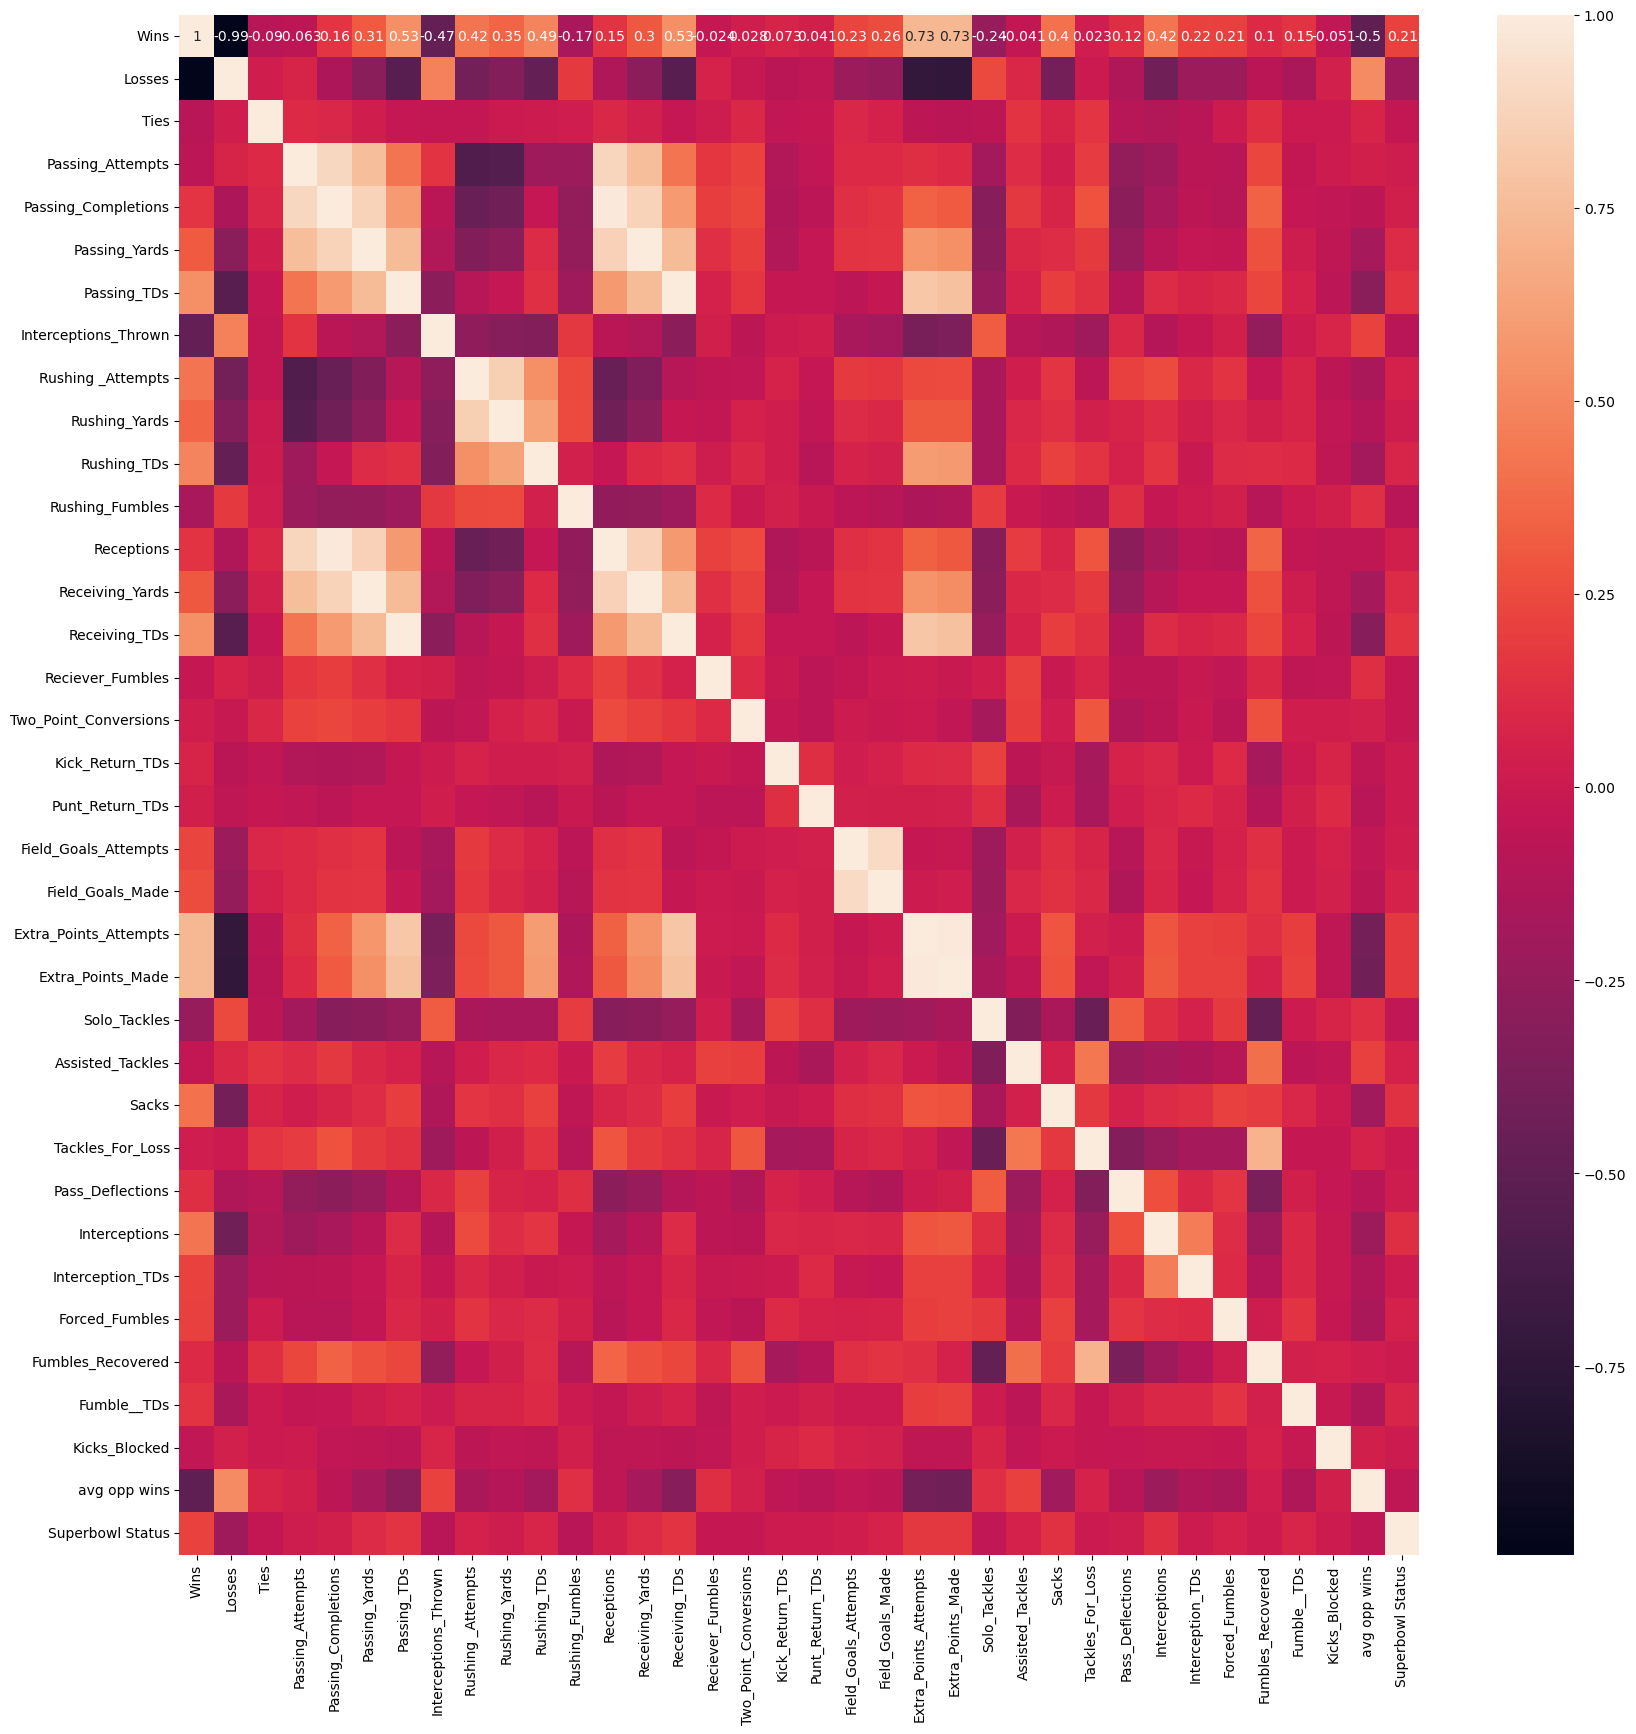

In [54]:
fig, ax = plt.subplots(figsize = (20,20))
corr_mat = stats.corr()
sns.heatmap(corr_mat, annot = True)

In [51]:
stats.columns

Index(['Wins', 'Losses', 'Ties', 'Passing_Attempts', 'Passing_Completions',
       'Passing_Yards', 'Passing_TDs', 'Interceptions_Thrown',
       'Rushing _Attempts', 'Rushing_Yards', 'Rushing_TDs', 'Rushing_Fumbles',
       'Receptions', 'Receiving_Yards', 'Receiving_TDs', 'Reciever_Fumbles',
       'Two_Point_Conversions', 'Kick_Return_TDs', 'Punt_Return_TDs',
       'Field_Goals_Attempts', 'Field_Goals_Made', 'Extra_Points_Attempts',
       'Extra_Points_Made', 'Solo_Tackles', 'Assisted_Tackles', 'Sacks',
       'Tackles_For_Loss', 'Pass_Deflections', 'Interceptions',
       'Interception_TDs', 'Forced_Fumbles', 'Fumbles_Recovered',
       'Fumble__TDs', 'Kicks_Blocked', 'avg opp wins', 'Superbowl Status'],
      dtype='object')

In [ ]:
stats["Passing_Completion_Pct"] = stats["Passing_Completions"]/stats["Passing_Attempts"]
stats["Yards_Per_Throw"] = stats["Passing_Yards"]/stats["Passing_Attempts"]


stats = stats.drop(["Passing_Completions","Passing_Attempts"], axis = 1)

In [52]:
stats.to_csv('../data/processed/season_data.csv')